In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

## Defining numu sidebands

In [3]:
RUN = ["3_crt","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    # set this to true to let the data loading function know that we are loading numu
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/NuMuSideband_PostCRTFix_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run3.root
Dataset muon_sideband is a data or EXT file


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/PostCRTFix_bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run3.root
is_mc= False
get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nu.root


../../data_loading.py:776: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


is_mc= False


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsGenie', 'weightsFlux', 'weightsReint'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nue.root
is_mc= False
get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_dirt.root
is_mc= False
get_rundict: run_number= 3_crt
get_rundict: run_number= 1
get_rundict: run_number= 3_crt
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 1
get_rundict: run_number= 4d
The sideband data you're using had the following

In [4]:
from microfit.histogram import Binning, MultiChannelBinning

numu_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")

numu_binning_np = numu_binning.copy()
numu_binning_np.label = "NUMUCRTNP0PI"
numu_binning_np.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")

numu_binning_zpi = numu_binning.copy()
numu_binning_zpi.label = "NUMUCRT0P0PI"
numu_binning_zpi.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")

numu_binning_inclusive = numu_binning.copy()
numu_binning_inclusive.label = "NUMUCRT"
numu_binning_inclusive.set_selection(preselection="NUMUCRT", selection="NUMUCRT")

# numu_binning_np = numu_binning.copy()
# numu_binning_np.label = "NUMUNP0PI"
# numu_binning_np.set_selection(preselection="NUMU", selection="NUMUNP0PI")

# numu_binning_zpi = numu_binning.copy()
# numu_binning_zpi.label = "NUMU0P0PI"
# numu_binning_zpi.set_selection(preselection="NUMU", selection="NUMU0P0PI")

# numu_binning_inclusive = numu_binning.copy()
# numu_binning_inclusive.label = "NUMU"
# numu_binning_inclusive.set_selection(preselection="NUMU", selection="NUMU")

sideband_binning = MultiChannelBinning([numu_binning_np, numu_binning_zpi, numu_binning_inclusive])

In [5]:
from microfit.histogram import RunHistGenerator

sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
)

../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


../../microfit/run_plotter.py:116: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/histogram/histogram.py:538: UserWarning: The internal _bin_counts array has off-diagonal elements. The off-diagonal elements will be lost when dividing by an ndarray.
  "The internal _bin_counts array has off-diagonal elements. "


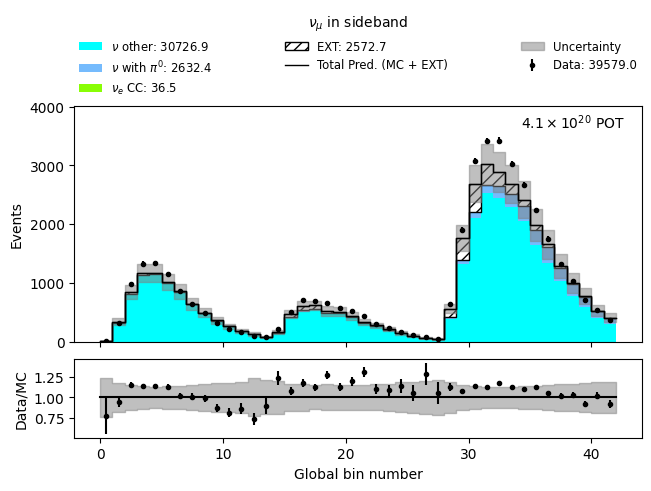

In [6]:
from microfit.run_plotter import RunHistPlotter

ax, ax_ratio = RunHistPlotter(sideband_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
)
legend = ax.get_legend()
legend.set_title(r"$\nu_\mu$ in sideband")


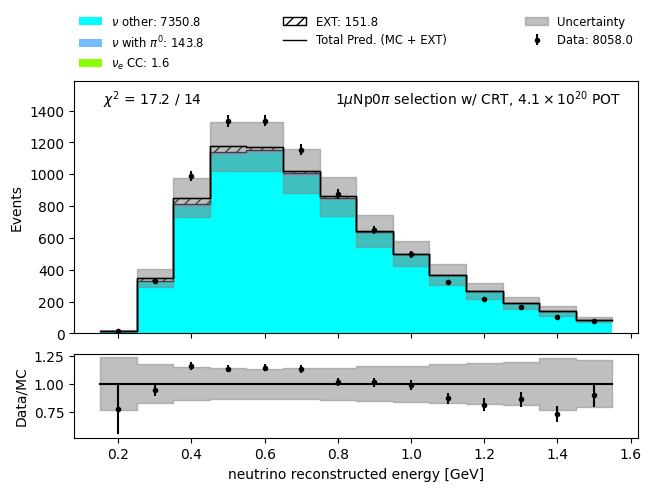

In [7]:
ax, ax_ratio = RunHistPlotter(sideband_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False, channel="NUMUCRTNP0PI", show_chi_square=True
)


<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

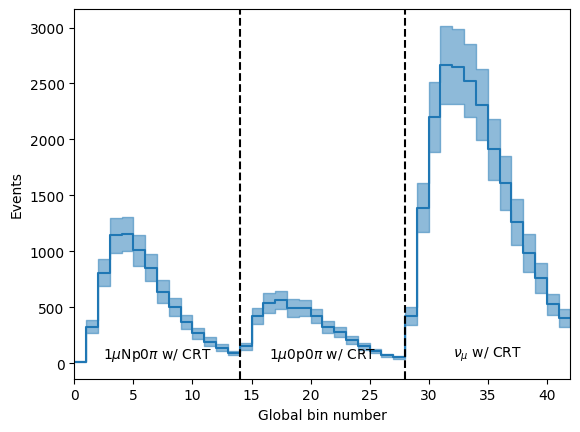

In [8]:
combined_sideband_hist = sideband_generator.get_mc_hist(include_multisim_errors=True)
combined_sideband_hist.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

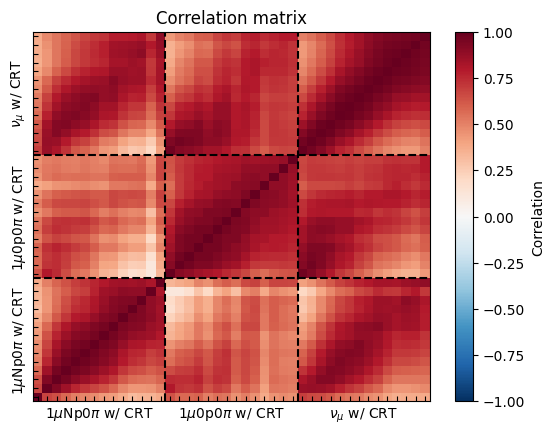

In [9]:
combined_sideband_hist.draw_covariance_matrix()

## Define two-shower sideband

In [10]:
RUN = ["3_crt","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = load_runs(
    RUN,
    data="two_shr_sideband",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/TwoShowers_PostCRTFix_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run3.root
Dataset two_shr_sideband is a data or EXT file


../../data_loading.py:1097: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1097: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:613: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:613: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))


is_mc= False
get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/PostCRTFix_bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run3.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nu.root


../../data_loading.py:776: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


is_mc= True


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsGenie', 'weightsFlux', 'weightsReint'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nue.root
is_mc= True
get_rundict: run_number= 3_crt
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3_crt
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_dirt.root
is_mc= True
get_rundict: run_number= 3_crt
get_rundict: run_number= 1
get_rundict: run_number= 3_crt
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 4d
get_rundict: run_number= 1
get_rundict: run_number= 4d
The sideband data you're using had the foll

In [11]:
two_shr_sideband_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
two_shr_sideband_binning.label = "TWOSHR"

two_shr_sideband_generator = RunHistGenerator(
    rundata,
    two_shr_sideband_binning,
    data_pot=data_pot,
    selection="ZPLOOSESELTWOSHR",
    preselection="ZPTwoShrCRT",
)

(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Data/MC'>)

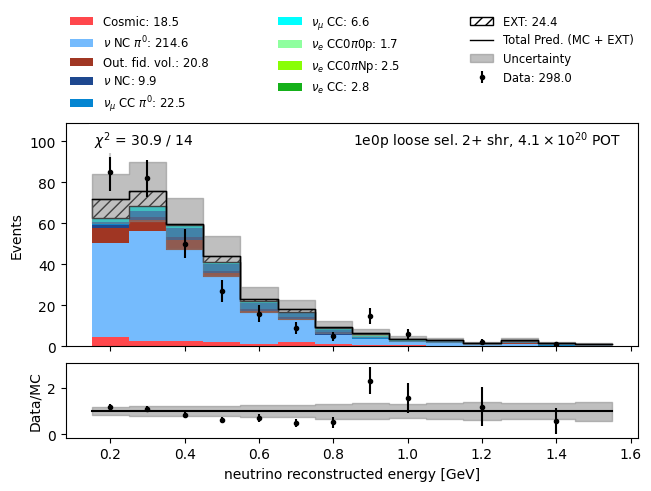

In [12]:
RunHistPlotter(two_shr_sideband_generator).plot(category_column="category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False, show_chi_square=True)

## Load the signals

In [13]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

In [14]:
RUN = ["1","2","3","4b","4c","4d","5"]
# RUN = ["3"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
Loading lee sample
get_rundict: run_number= 2
get_rundict: run_number= 1
get_rundict: run_number= 2
get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
Loading lee sample
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
Loading lee sample
get_rundict: run_number= 4b


In [15]:
from microfit.histogram import Binning, MultiChannelBinning

binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

signal_binning = MultiChannelBinning([binning_npl, binning_zpl])

In [16]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.histogram import RunHistGenerator

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)

In [17]:
mc_hists = signal_generator.get_mc_hists(category_column="paper_category")

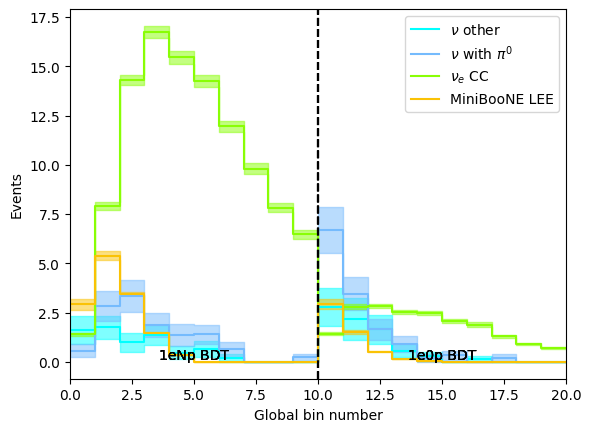

In [18]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()
for mc_hist in mc_hists.values():
    mc_hist.draw(ax=ax, label=mc_hist.tex_string)
ax.legend()

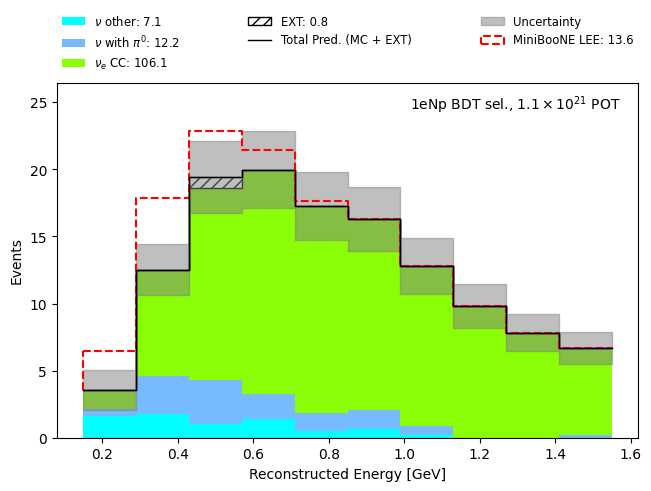

In [19]:
from microfit.run_plotter import RunHistPlotter

# signal_generator.parameters["signal_strength"].value = 1.0


ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", 
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    channel="NPBDT", 
    # separate_signal=False
)

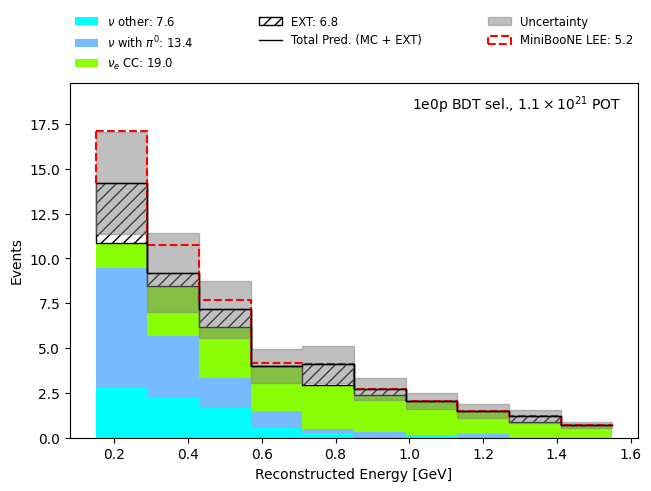

In [20]:
ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="ZPBDT",
)

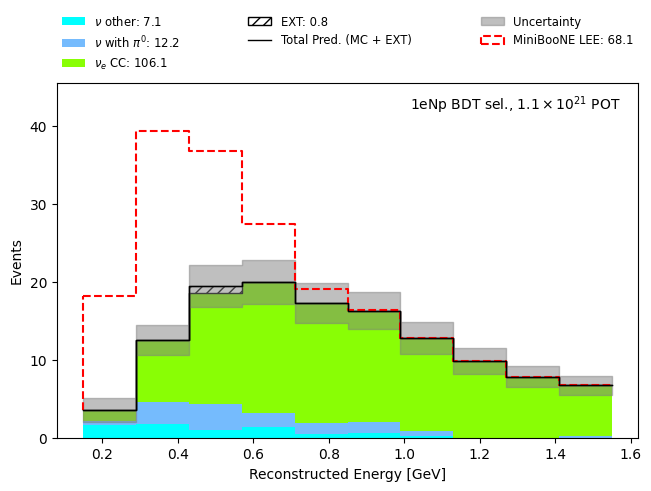

In [21]:
signal_generator.parameters["signal_strength"].value = 5.0

ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",
)

## Assemble Analysis

In [22]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[sideband_generator, two_shr_sideband_generator, signal_generator],
    constraint_channels=["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"],
    signal_channels=["NPBDT", "ZPBDT"],
)


In [23]:
analysis.parameters["signal_strength"].value = 1.0

../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


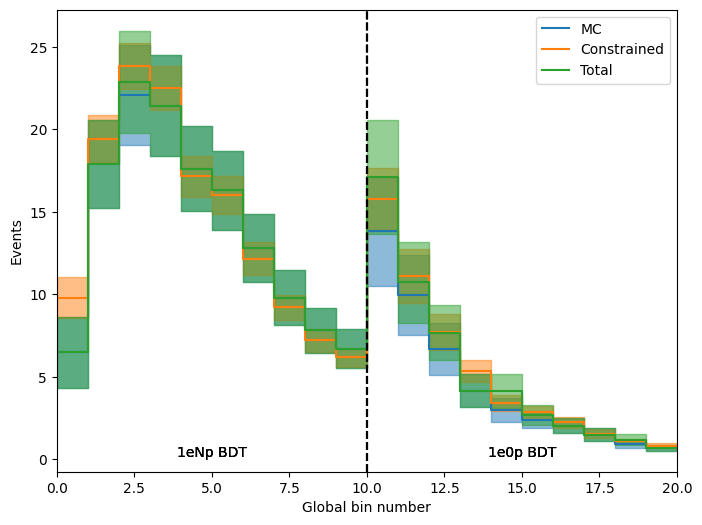

In [24]:
import matplotlib.pyplot as plt

mc_hist = analysis.get_mc_hist(include_multisim_errors=True)
mc_hist_constrained = analysis.get_mc_hist(include_multisim_errors=True, use_sideband=True)
total_hist = analysis.generate_multiband_histogram(include_multisim_errors=True, include_non_signal_channels=False)

fig, ax = plt.subplots(figsize=(8, 6))
mc_hist.draw(ax=ax, label="MC")
mc_hist_constrained.draw(ax=ax, label="Constrained")
total_hist.draw(ax=ax, label="Total")
ax.legend()


In [25]:
analysis.parameters["signal_strength"].value = 1.0

In [26]:
analysis.plot_signals(
    add_ext_error_floor=False,
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    use_sideband=True,
    separate_figures=True,
    run_title="Run 1-5",
    save_path="./new_sideband_plan_b/",
)

../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


In [27]:
analysis.plot_sidebands(
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    separate_figures=True,
    save_path="./new_sideband_plan_b/",
    run_title="Sidebands run 3-5",
)

../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",
../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",
../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


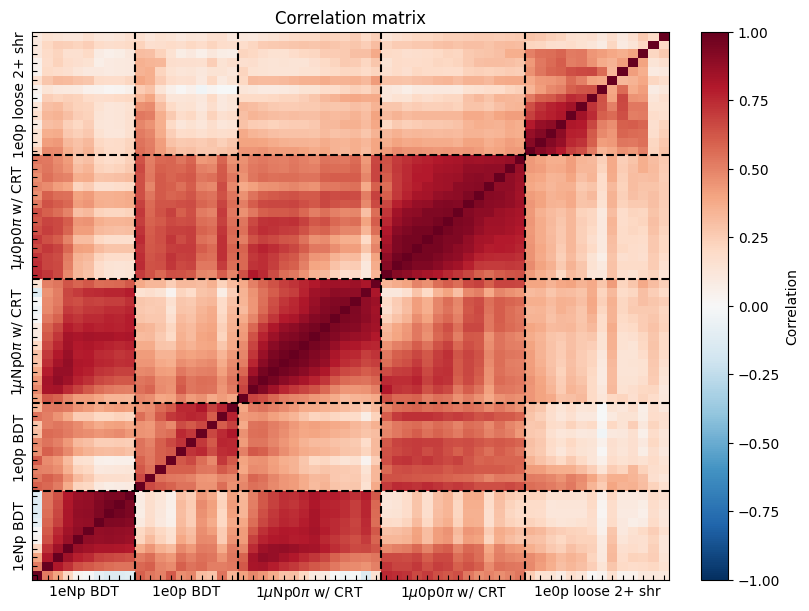

In [28]:
fig, ax = analysis.plot_correlation()
fig.savefig("./new_sideband_plan_b/constraint_correlation.pdf")

In [29]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

In [30]:
analysis.parameters["signal_strength"].value = 1.0

multi_channel_mc_hist = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    include_non_signal_channels=True,
)

../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

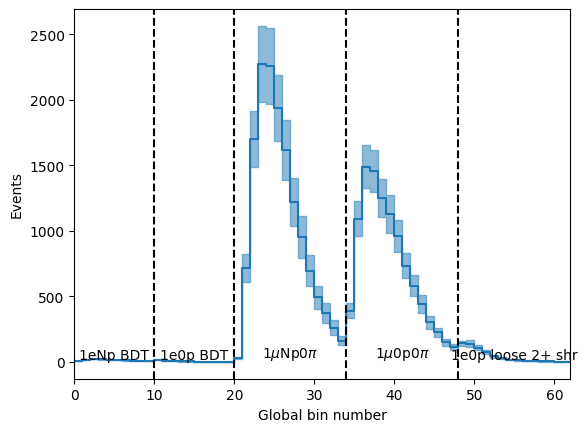

In [31]:
multi_channel_mc_hist.draw()

In [32]:
multi_channel_hist_unconstrained = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=False,
)

multi_channel_hist_new_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMUNP0PI", "NUMU0P0PI", "TWOSHR"],
)

multi_channel_hist_old_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMU"],
)

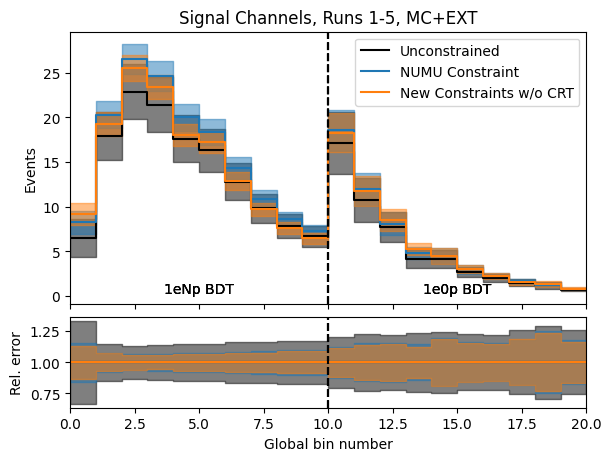

In [33]:
fig, ax = plt.subplots(figsize=(6, 4.5), constrained_layout=True, nrows=2, gridspec_kw={"height_ratios": [3, 1]}, sharex=True)
multi_channel_hist_unconstrained.draw(ax=ax[0], label="Unconstrained", color="black")
multi_channel_hist_old_constraints.draw(ax=ax[0], label="NUMU Constraint")
multi_channel_hist_new_constraints.draw(ax=ax[0], label="New Constraints w/o CRT")

rel_error_unconstr = multi_channel_hist_unconstrained / multi_channel_hist_unconstrained.bin_counts
rel_error_unconstr.draw(ax=ax[1], color="k", show_channel_labels=False)

rel_error_old = multi_channel_hist_old_constraints / multi_channel_hist_old_constraints.bin_counts
rel_error_old.draw(ax=ax[1], show_channel_labels=False)

rel_error_new = multi_channel_hist_new_constraints / multi_channel_hist_new_constraints.bin_counts
rel_error_new.draw(ax=ax[1], show_channel_labels=False)
ax[0].set_xlabel("")
ax[1].set_xlabel("Global bin number")
ax[1].set_ylabel("Rel. error")
ax[0].legend()
ax[0].set_title("Signal Channels, Runs 1-5, MC+EXT")
fig.savefig("new_sideband_no_crt_ana_plots/signal_channels_runs1-5_constraint_comparison.pdf")


## Get the Sensitivity

In [29]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_new_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

Generating H0 histogram
Generating H1 histogram


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",
Generating pseudo-experiments: 100%|██████████| 10000/10000 [00:44<00:00, 226.44it/s]


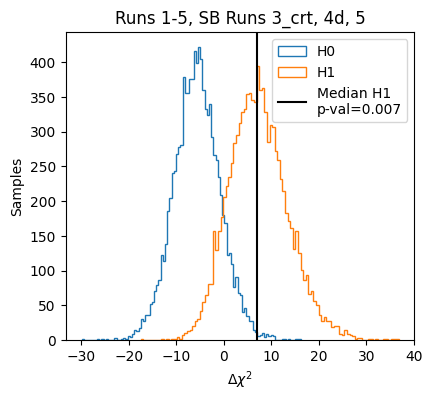

In [30]:
plt.figure(figsize=(4.5, 4))
plt.hist(two_hypo_result_new_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_new_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_new_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_new_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, SB Runs 3_crt, 4d, 5")
plt.savefig("new_sideband_plan_b/runs1-5_sensitivity_new_constraints.pdf")
plt.show()

In [37]:
analysis.constraint_channels = ["NUMUCRT"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_old_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

Generating H0 histogram
Generating H1 histogram


Generating pseudo-experiments: 100%|██████████| 10000/10000 [01:48<00:00, 92.42it/s]


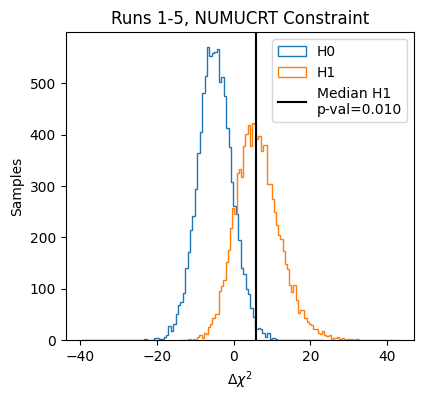

In [38]:
plt.figure(figsize=(4.5, 4))
plt.hist(two_hypo_result_old_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_old_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_old_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_old_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, NUMUCRT Constraint")
plt.savefig("runs1-5_sensitivity_numucrt_constraint.pdf")
plt.show()

In [40]:
import numpy as np

scan_points = np.linspace(0, 5, 40)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    parameter_name="signal_strength",
    n_trials=1000,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

Running FC scan over 40 points in signal_strength...


Scanning: 100%|██████████| 40/40 [58:18<00:00, 87.47s/it] 


Calculating Asimov sensitivity for 40 points...


In [41]:
from microfit.fileio import to_json

# to_json("runs1-5_numucrt_fc_scan_results.json", fc_scan_results)

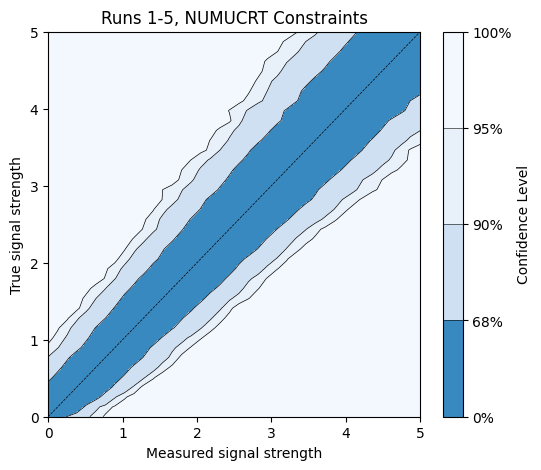

In [42]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
ax.set_title("Runs 1-5, NUMUCRT Constraints")
fig.savefig("runs1-5_fc_scan_numucrt_constraint.pdf")

In [43]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

import numpy as np

scan_points = np.linspace(0, 5, 40)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    parameter_name="signal_strength",
    n_trials=1000,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

Running FC scan over 40 points in signal_strength...


Scanning:   0%|          | 0/40 [00:00<?, ?it/s]

Scanning: 100%|██████████| 40/40 [58:10<00:00, 87.25s/it]


Calculating Asimov sensitivity for 40 points...


In [44]:
to_json("runs1-5_new_constraints_fc_scan_results.json", fc_scan_results)

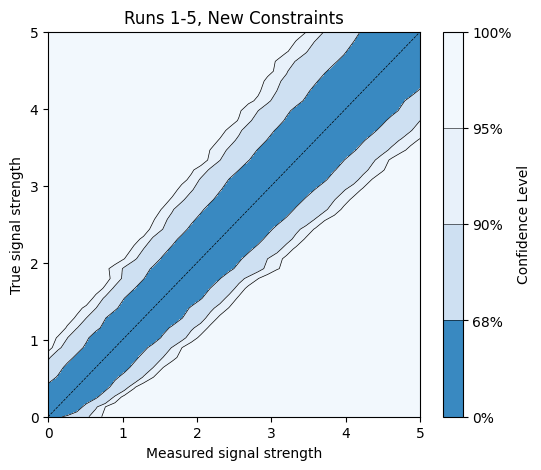

In [45]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))

ax.set_title("Runs 1-5, New Constraints")
fig.savefig("runs1-5_fc_scan_new_constraints.pdf")

In [46]:
from microfit.fileio import from_json


fc_scan_results_old_constraints = from_json("runs1-5_numucrt_fc_scan_results.json")

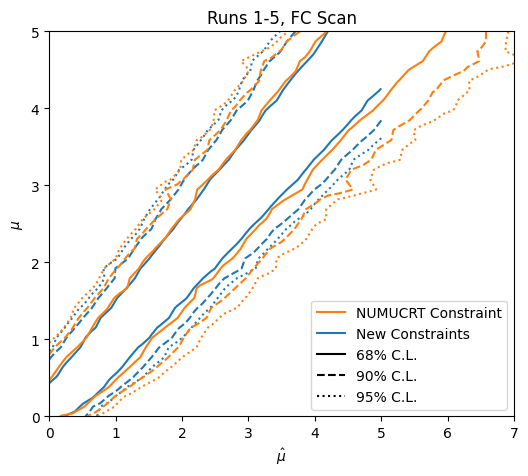

In [47]:
fig, ax = plt.subplots(figsize=(6, 5))
levels = [0.0, 0.68, 0.9, 0.95, 1.0]
linestyles = ["-", "-", "--", ":"]
pval_map = fc_scan_results["pval_map"]
X, Y = fc_scan_results["measured_map"], fc_scan_results["truth_map"]
# draw contours for fc_scan_results and for fc_scan_results_old_constraints on the same plot
ax.contour(X, Y, pval_map, levels=levels, colors="C0", linestyles=linestyles)
pval_map_old_constraints = fc_scan_results_old_constraints["pval_map"]
X_old_constraints, Y_old_constraints = fc_scan_results_old_constraints["measured_map"], fc_scan_results_old_constraints["truth_map"]
ax.contour(X_old_constraints, Y_old_constraints, pval_map_old_constraints, levels=levels, colors="C1", linestyles=linestyles)
ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel(r"$\mu$")
ax.set_title("Runs 1-5, FC Scan")

# Add a legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="C1", linestyle="-", label="NUMUCRT Constraint"),
    Line2D([0], [0], color="C0", linestyle="-", label="New Constraints"),
    # show the contour levels in the legend in black
    Line2D([0], [0], color="black", linestyle="-", label="68% C.L."),
    Line2D([0], [0], color="black", linestyle="--", label="90% C.L."),
    Line2D([0], [0], color="black", linestyle=":", label="95% C.L."),
]
ax.legend(handles=legend_elements, loc="lower right")

fig.savefig("runs1-5_fc_scan_comparison.pdf")